In [1]:
#Seaborn Installation 
#!pip install seaborn

##Import Seaborn and dependencies
import numpy as np # linear algebra
import pandas as pd  # Manage data structures
import matplotlib.pyplot as plt
#enable inline display of plots or visualizations 
%matplotlib inline
import seaborn as sns

In [2]:
# Load World Happiness Index by Reports 2013-2023 dataset using panadas
df = pd.read_csv('datasets/World_Happiness_Index_by_Reports_2013-2023_no_nulls.csv')
df.head()   #show the first 5 rows of the dataset


,Country,Year,Index,Rank
0,Afghanistan,2013,4.040,143
1,Afghanistan,2015,3.575,153
2,Afghanistan,2016,3.360,154
3,Afghanistan,2017,3.794,141
4,Afghanistan,2018,3.632,145


In [3]:
df.columns

Index(['Country', 'Year', 'Index', 'Rank'], dtype='object')

In [4]:
df.shape

(1523, 4)

# Seaborn Visualizing Distributions Of Data


## Axes-level visualization functions

### Plot a histogram


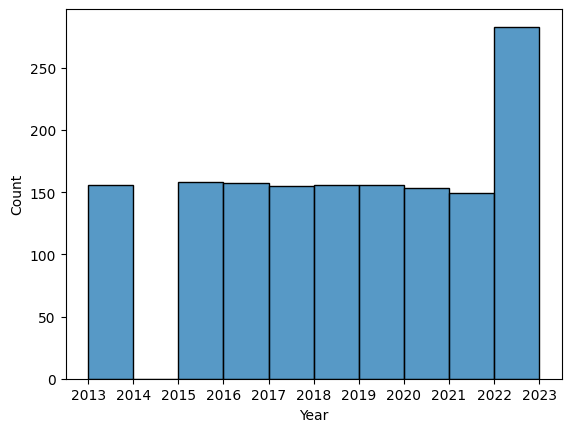

In [5]:
# Create bin edges so that each year has its own bin
bins = list(range(2013, 2024))  # Starts from 2013 to ensure 2013 has its own bin and goes up to 2024

# Create the plot counting the number of data points that fall into each year range
sns.histplot(df['Year'], bins=bins, kde=False)

# Set x-ticks for clarity
plt.xticks(bins)

# Display the plot
plt.show()


## Rug plot and kde shading

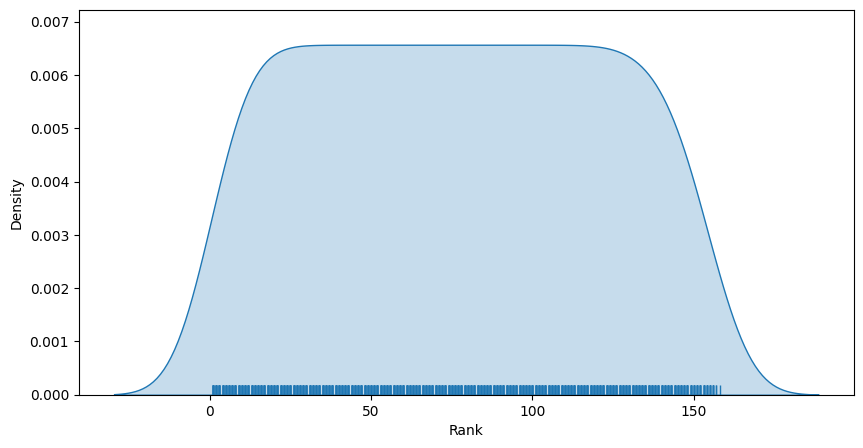

In [6]:
# Set up the figure and axis
plt.figure(figsize=(10, 5))

# Create the KDE plot with filling
sns.kdeplot(df['Rank'], fill=True)

# Add a rug plot
sns.rugplot(df['Rank'])

# Display the plot
plt.show()


## Regression Plots in Seaborn


### regplot() Funcation 


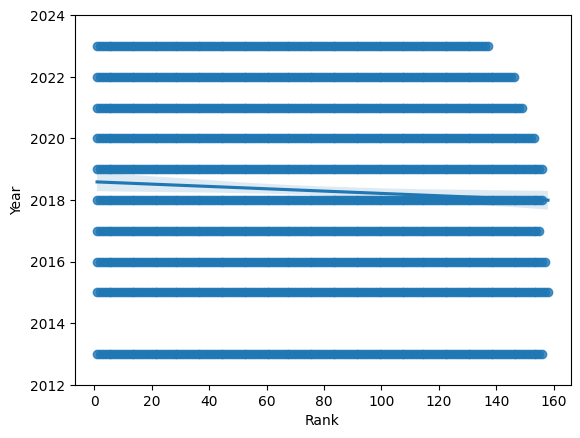

In [7]:
# Create a regression plot of Year vs. Rank
sns.regplot(x="Rank", y="Year", data=df)

# Adjust y-axis limits to ensure all years are displayed
plt.ylim(2012, 2024)

# Display the plot
plt.show()


## lmplot()


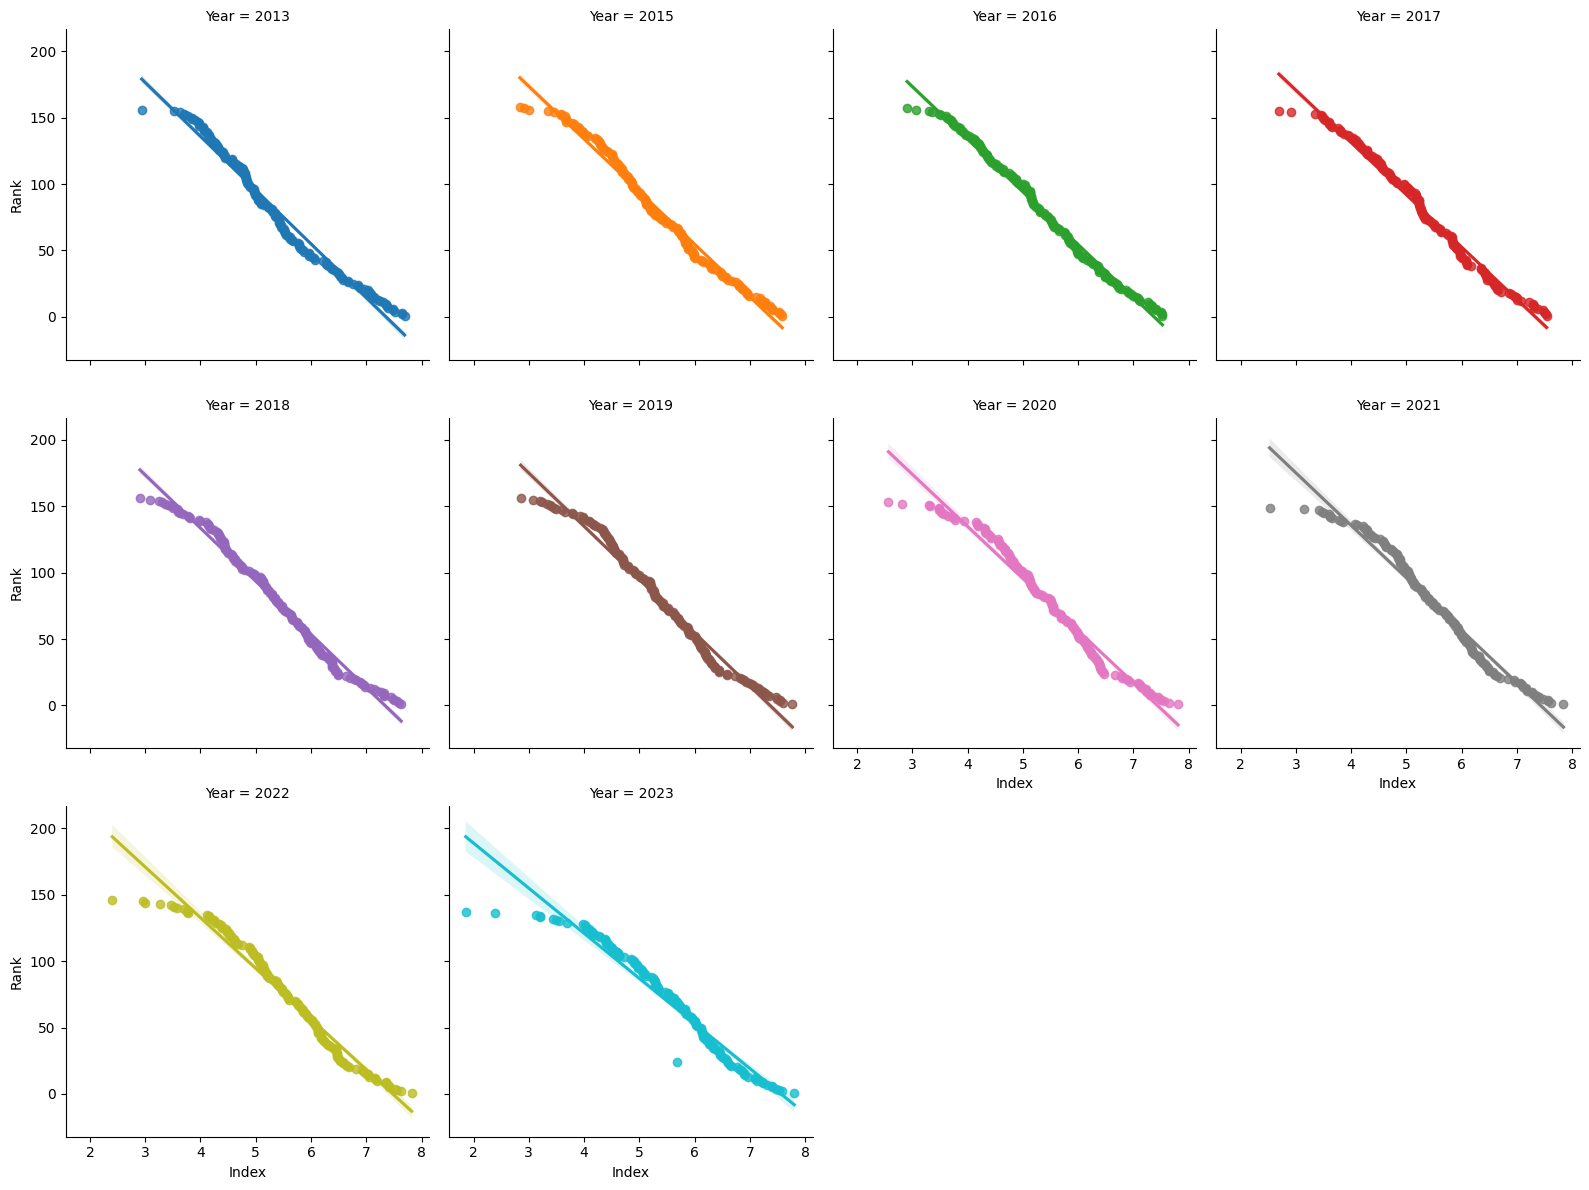

In [8]:
sns.lmplot(data=df,
           x="Index",
           y="Rank",
           hue="Year",
           col="Year",
           height=4,
           aspect=1,
           col_wrap=4)  # Adjust as needed. This will put 4 plots in one row.
plt.show()

# Using Seaborn Styles

## Setting the default style

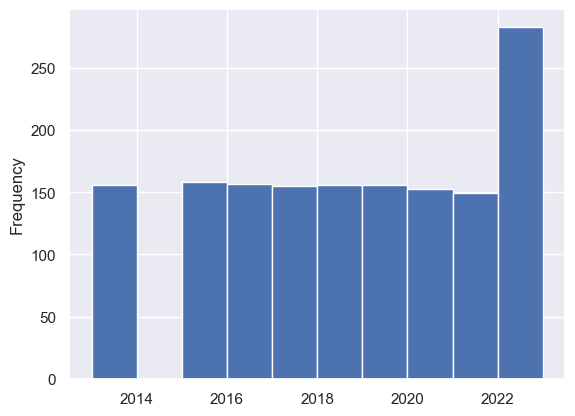

<Figure size 640x480 with 0 Axes>

In [9]:
# Set the default seaborn style
sns.set()

# Plot the pandas histogram 
df['Year'].plot.hist()
plt.show()
plt.clf()

## Removing spines


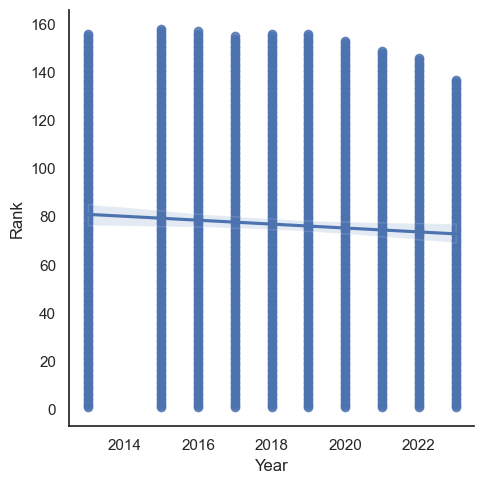

<Figure size 640x480 with 0 Axes>

In [10]:
# Set the style to white
sns.set_style('white')

# Create a regression plot
sns.lmplot(data=df,
           x='Year',
           y='Rank')

# Remove the spines
sns.despine(right=True)

# Show the plot and clear the figure
plt.show()
plt.clf()

# Colors in Seaborn


## Matplotlib color codes


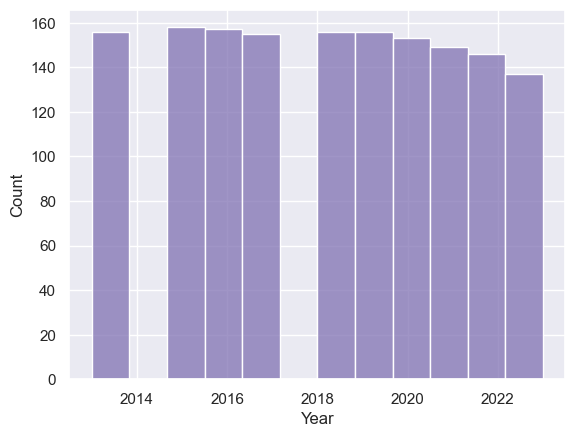

In [11]:
# Set style, enable color code, and create a magenta distplot
sns.set(color_codes=True)
sns.histplot(df['Year'], color='m')

# Show the plot
plt.show()

## Using default palettes


Circular Colors: Use when the data lacks a specific order or sequence

Sequential Colors: Ideal for data with a consistent range, progressing from low to hig



Diverging Colors: Best suited for data where both extremes (low and high values) are of significance.

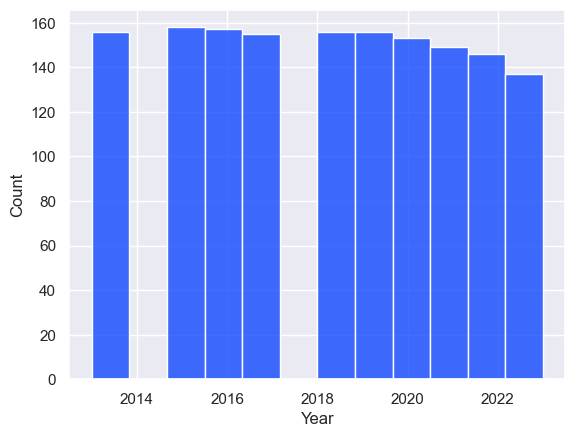

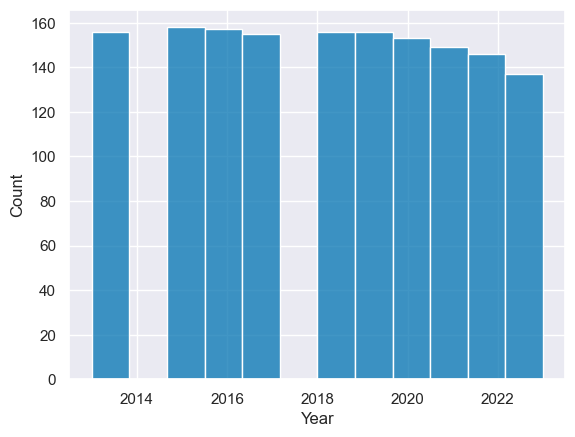

<Figure size 640x480 with 0 Axes>

In [12]:
# Loop through differences between bright and colorblind palettes
for p in ['bright', 'colorblind']:
    sns.set_palette(p)
    sns.histplot(df['Year'])
    plt.show()
    
    # Clear the plots 
    plt.clf()

## Custom Palettes

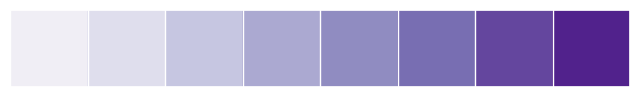

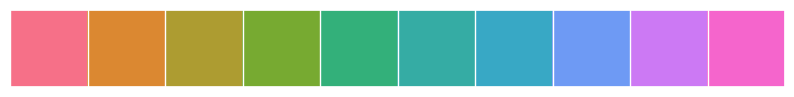

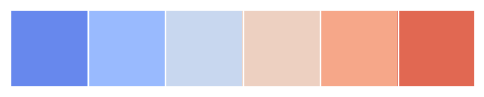

In [13]:
# Create and display a Purples sequential palette containing 8 colors.
sns.palplot(sns.color_palette( "Purples", 8))
plt.show()

# Create and display a palette with 10 colors using the husl system.
sns.palplot(sns.color_palette( "husl", 10))
plt.show()

# Create and display a diverging palette with 6 colors coolwarm.
sns.palplot(sns.color_palette( "coolwarm", 6))
plt.show()

## Customizing with matplotlib

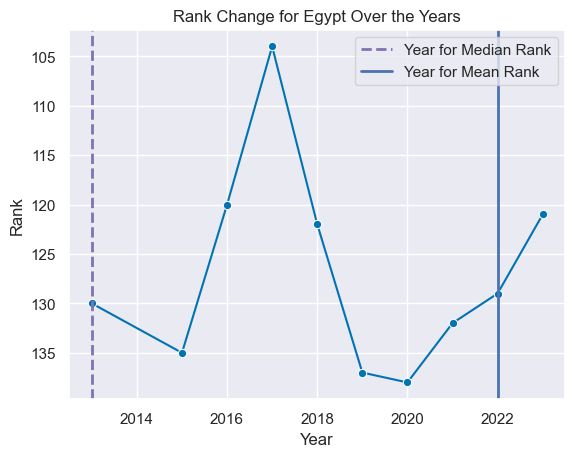

In [14]:
# Filter the dataframe to only include records for Egypt
egypt_data = df[df['Country'] == 'Egypt']

# Calculate the median and mean of the 'Rank' values for Egypt
median_rank = egypt_data['Rank'].median()
mean_rank = egypt_data['Rank'].mean()

# Find the years closest to the median and mean rank values
year_for_median_rank = egypt_data.iloc[(egypt_data['Rank']-median_rank).abs().argsort()[:1]]['Year'].values[0]
year_for_mean_rank = egypt_data.iloc[(egypt_data['Rank']-mean_rank).abs().argsort()[:1]]['Year'].values[0]

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the change in rank across years
sns.lineplot(data=egypt_data, x='Year', y='Rank', ax=ax, marker='o')

# Invert the y-axis as a smaller rank (like 1) is typically considered better
ax.invert_yaxis()

# Set labels
ax.set_title('Rank Change for Egypt Over the Years')
ax.set_ylabel('Rank')
ax.set_xlabel('Year')

# Add vertical lines for the years corresponding to the median and mean rank values
ax.axvline(x=year_for_median_rank, color='m', label='Year for Median Rank', linestyle='--', linewidth=2)
ax.axvline(x=year_for_mean_rank, color='b', label='Year for Mean Rank', linestyle='-', linewidth=2)

# Display the legend
ax.legend()

# Show the plot
plt.show()


## Categorical Plot Types


## stripplot() and swarmplot()


In [15]:
tips = sns.load_dataset("tips")
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


<Axes: xlabel='total_bill'>

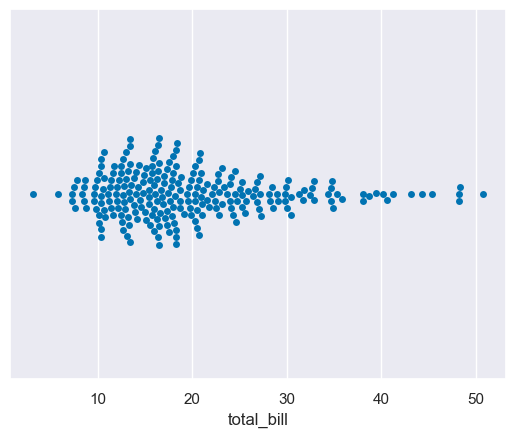

In [16]:
sns.swarmplot(data=tips, x="total_bill")

<Axes: xlabel='total_bill', ylabel='day'>

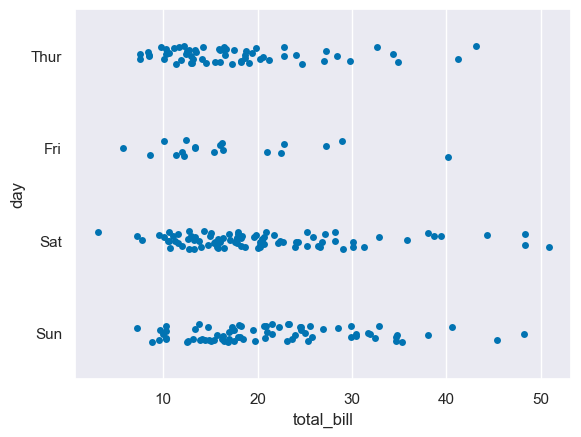

In [17]:
sns.stripplot(data=tips, x="total_bill", y="day")

## barplot, pointplot and countplot


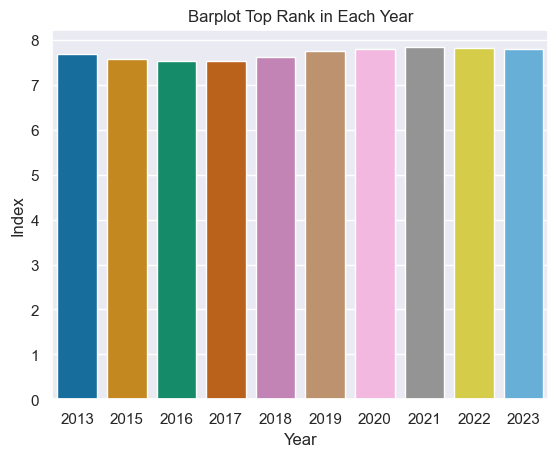

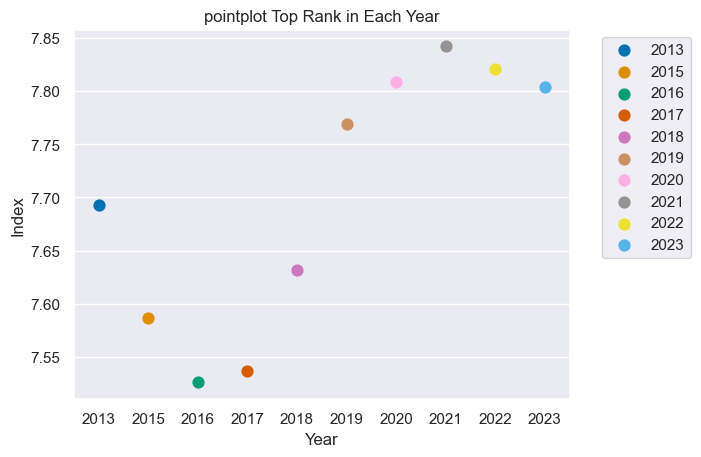

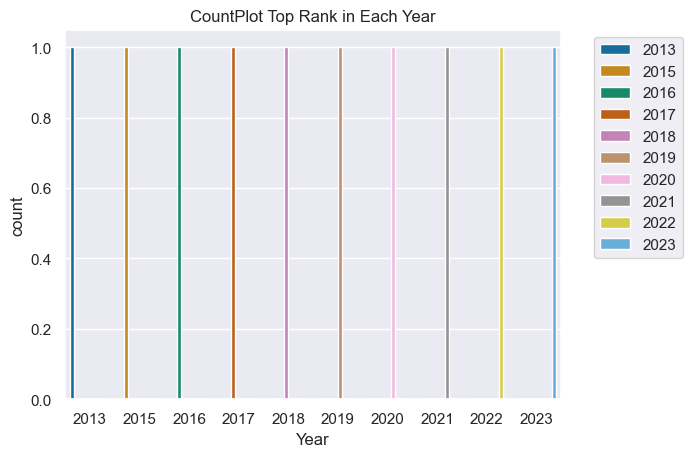

In [18]:
# Show a countplot with the number of models used with each region a different color

# Group by 'Year' and find the row with minimum 'Index'
top_rank_each_year = df.loc[df.groupby('Year')['Index'].idxmax()]
# Plot
sns.barplot(data=top_rank_each_year, x="Year", y="Index")
plt.title('Barplot Top Rank in Each Year')
plt.show()

sns.pointplot(data=top_rank_each_year, x="Year", y="Index", hue="Year")
plt.title('pointplot Top Rank in Each Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

sns.countplot(data=top_rank_each_year, x="Year", hue="Year")
plt.title('CountPlot Top Rank in Each Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## boxplots, violinplots 

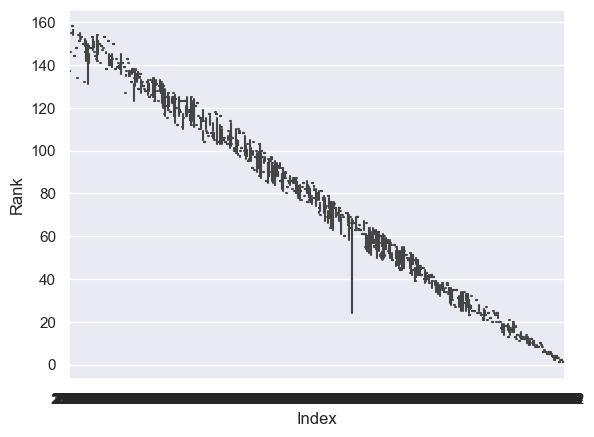

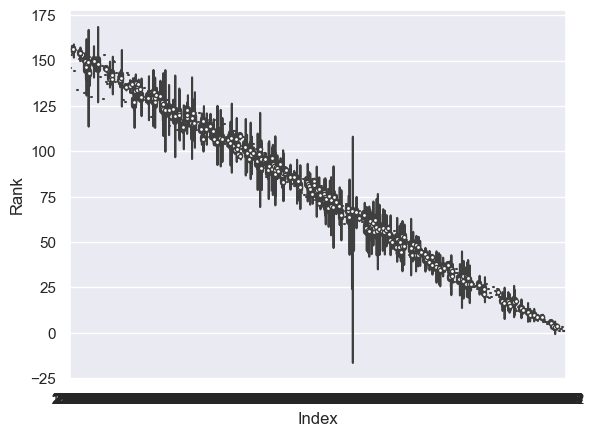

In [19]:
# Create a boxplot
sns.boxplot(data=df,
         x='Index',
         y='Rank')
plt.show()

# Create a violinplot with the husl palette
sns.violinplot(data=df,
         x='Index',
         y='Rank',
         palette='husl')

plt.show()


## Regression Plots

### Regression and residual plots


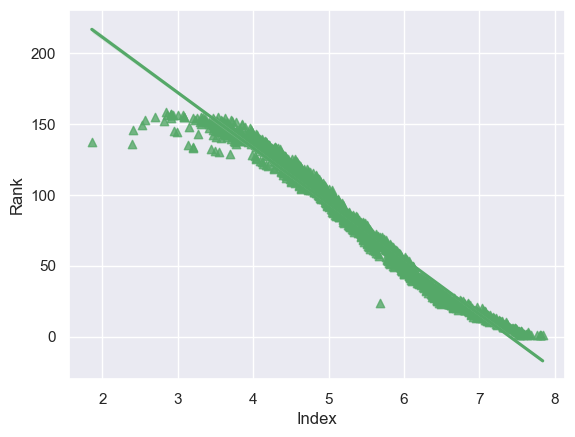

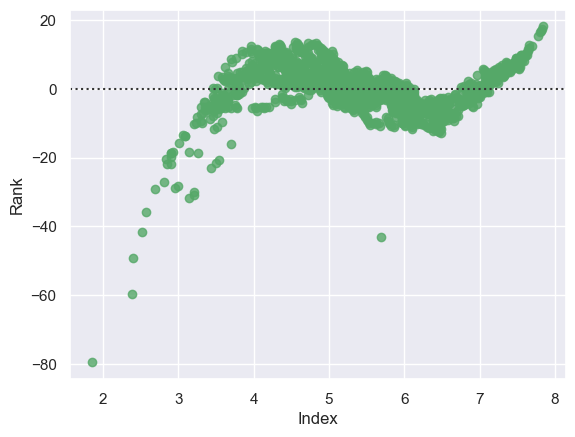

<Figure size 640x480 with 0 Axes>

In [20]:
# Display a regression plot for Rank
sns.regplot(data=df,
         y='Rank',
         x="Index",
         marker='^',
         color='g')

plt.show()
plt.clf()

# Display the residual plot
sns.residplot(data=df,
          y='Rank',
          x="Index",
          color='g')

plt.show()
plt.clf()

###  Regression plot parameters

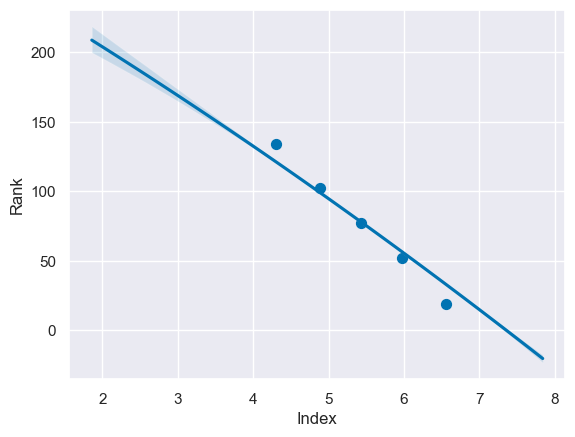

<Figure size 640x480 with 0 Axes>

In [21]:
# Plot a regression plot of Tuition and the Percentage of Pell Grants
sns.regplot(data=df,
            y='Rank',
            x="Index",
            #  breaks the PCTPELL column into 5 different bins.
            x_bins=5,
            # using a 2nd order polynomial regression line
            order=2)

plt.show()
plt.clf()

### Data Binning:

x_bins aids in segmenting data into distinct bins for analysis.

Despite the binning, the regression line is derived from the complete dataset.


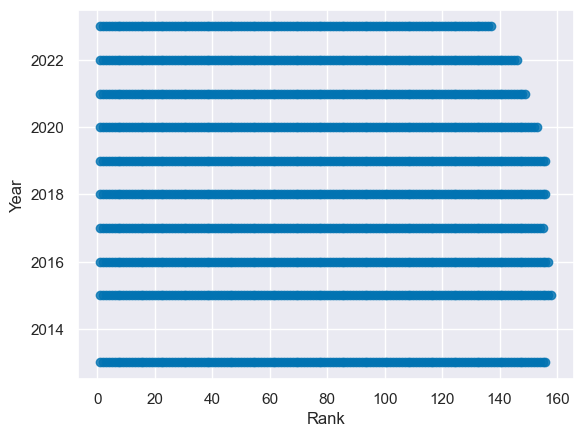

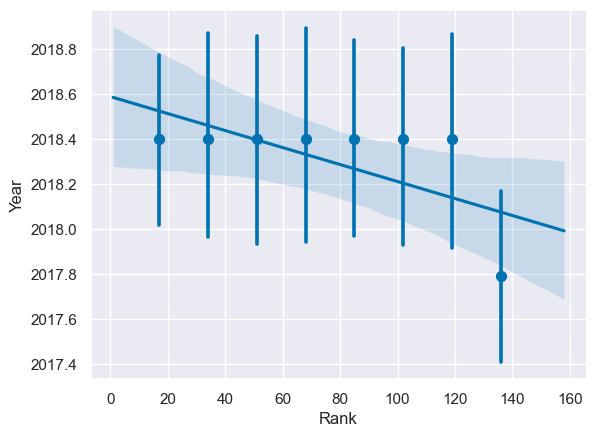

<Figure size 640x480 with 0 Axes>

In [22]:
# Create a scatter plot by disabling the regression line
sns.regplot(data=df,
            y='Year',
            x="Rank",
            # disable the regression line
            fit_reg=False) 

plt.show()
plt.clf()

# Create a regplot and bin the data into 8 bins
sns.regplot(data=df,
         y='Year',
         x="Rank",
         x_bins=8)

plt.show()
plt.clf()

## Matrix plots


Year  2013  2015  2016  2017  2018  2019  2020  2021  2022  2023
Rank                                                            
1        1     1     1     1     1     1     1     1     1     1
2        1     1     1     1     1     1     1     1     1     1
3        1     1     1     1     1     1     1     1     1     1
4        1     1     1     1     1     1     1     1     1     1
5        1     1     1     1     1     1     1     1     1     1
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
154      1     1     1     1     1     1     0     0     0     0
155      1     1     1     1     1     1     0     0     0     0
156      1     1     1     0     1     1     0     0     0     0
157      0     1     1     0     0     0     0     0     0     0
158      0     1     0     0     0     0     0     0     0     0

[158 rows x 10 columns]


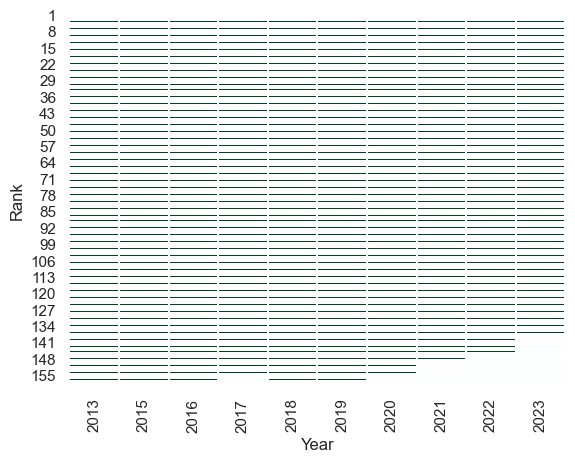

In [23]:

# Create a crosstab table of the data
pd_crosstab = pd.crosstab(df["Rank"], df["Year"])
print(pd_crosstab)

# Plot a heatmap of the table with no color bar and using the BuGn palette
sns.heatmap(pd_crosstab, cbar=False, cmap="BuGn", linewidths=0.3)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.show()


# Creating Plots on Data Aware Grids


## Using FacetGrid, lmplot


### FacetGrid


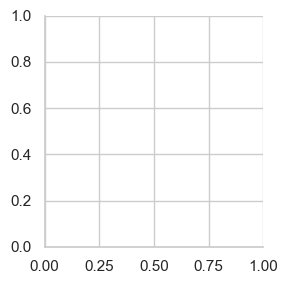

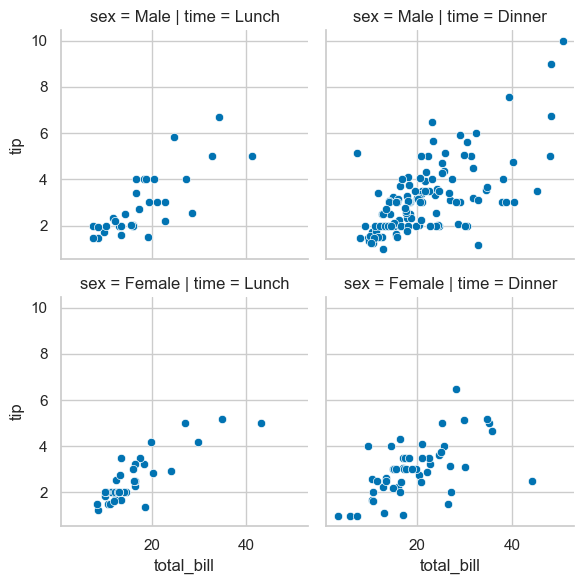

In [33]:
tips = sns.load_dataset("tips")
sns.FacetGrid(tips)
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map(sns.scatterplot, "total_bill", "tip")

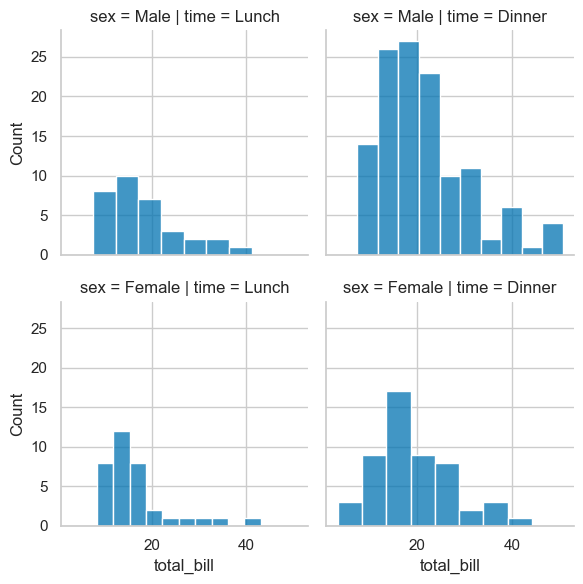

In [34]:
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map_dataframe(sns.histplot, x="total_bill")

## Using a lmplot
The lmplot is used to plot scatter plots with regression lines on FacetGrid objects.



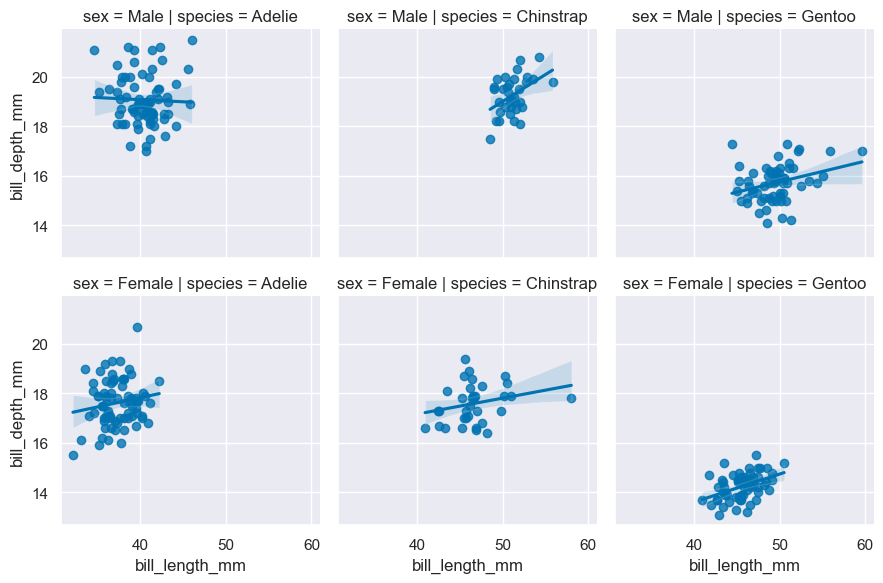

In [26]:
penguins = sns.load_dataset("penguins")
sns.lmplot(
    data=penguins, x="bill_length_mm", y="bill_depth_mm",
    col="species", row="sex", height=3,
)

## Using PairGrid and pairplot


## Building a PairGrid

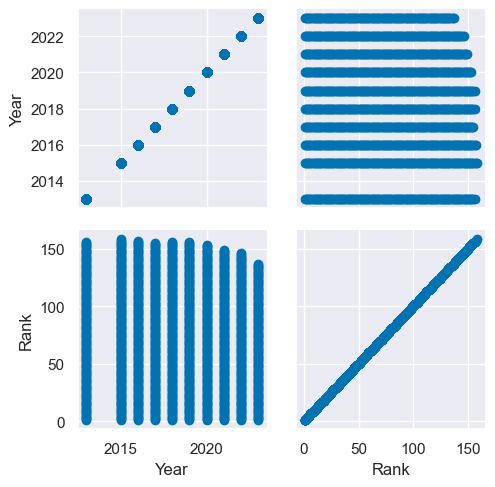

<Figure size 640x480 with 0 Axes>

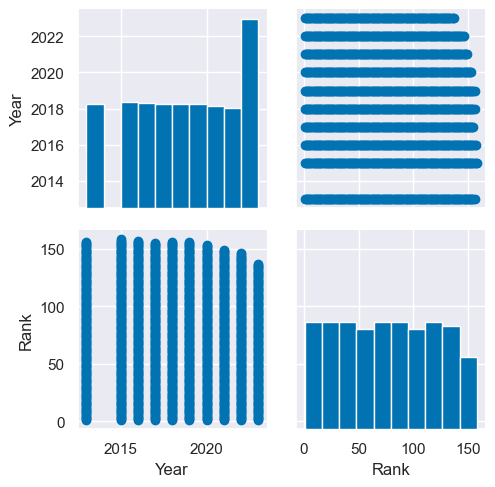

<Figure size 640x480 with 0 Axes>

In [27]:
# Create a PairGrid with a scatter plot for Year and Rank
g = sns.PairGrid(df, vars=["Year", "Rank"])
g2 = g.map(plt.scatter)

plt.show()
plt.clf()

# Create the same PairGrid but map a histogram on the diag
g = sns.PairGrid(df, vars=["Year", "Rank"])
g2 = g.map_diag(plt.hist)  # plot a histogram on the diagonal
g3 = g2.map_offdiag(plt.scatter)  # scatter plot on the off diagonal

plt.show()
plt.clf()

## Using a pairplot


The pairplot() function is generally a more convenient way to look at pairwise relationships.



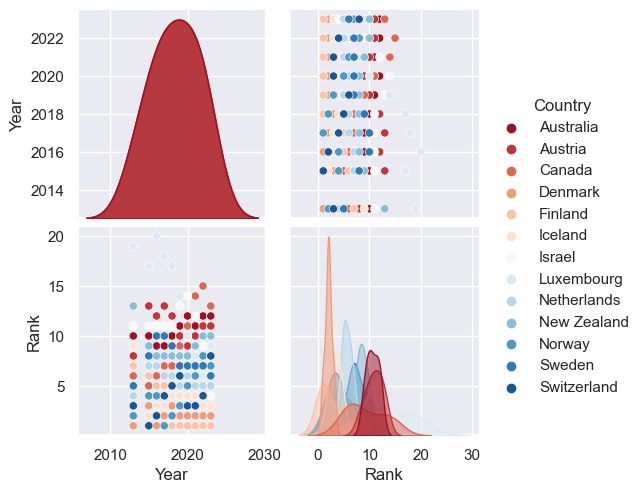

<Figure size 640x480 with 0 Axes>

In [28]:
# Get the top 10 countries with the highest rank (i.e., lowest rank values) for each year
top_countries_per_year = df.groupby('Year').apply(lambda x: x.nsmallest(10, 'Rank')['Country']).reset_index(drop=True)

# Filter the dataframe to only include records for these top countries
top_df = df[df['Country'].isin(top_countries_per_year)]

# Plot the data using the given columns and color code by Country
sns.pairplot(data=top_df,
             vars=["Year", "Rank"],
             kind='scatter',
             # using the "Country" to color code the results
             hue='Country',
             palette='RdBu',
             diag_kws={'alpha':.5})

plt.show()
plt.clf()


## Using JointGrid and jointplot

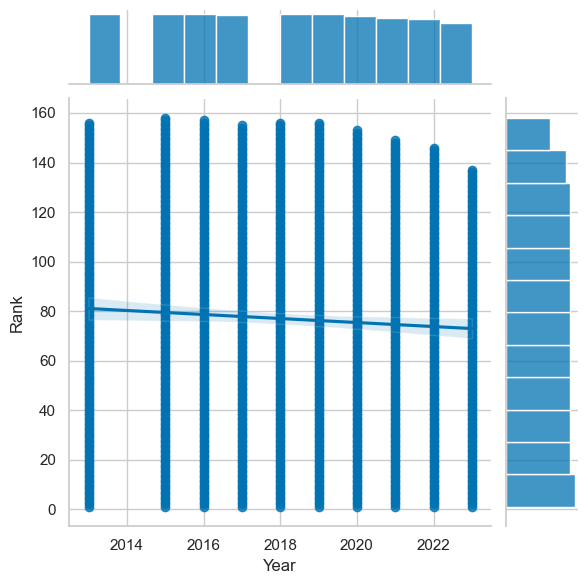

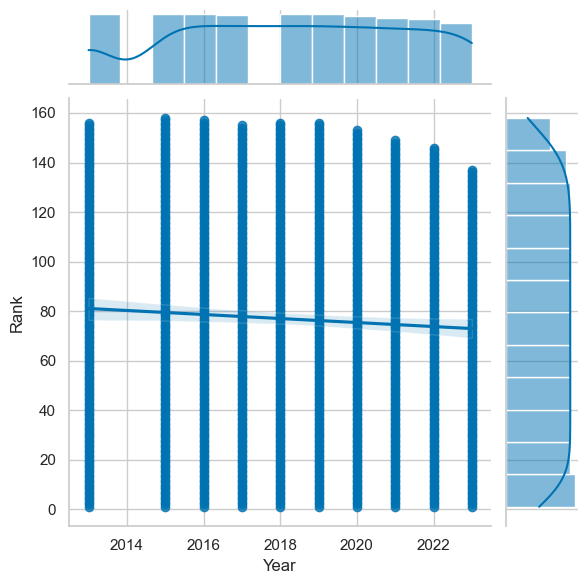

In [29]:
# Build a JointGrid comparing Year and Rank
sns.set_style("whitegrid") # Use Seaborn's "whitegrid" style for these plots.
g = sns.JointGrid(x="Year",
            y="Rank",
            data=df) 

# Plot a regplot() and distplot() on the margins.
g.plot(sns.regplot, sns.histplot)

plt.show()

# Create a jointplot similar to the JointGrid 
sns.jointplot(x="Year",
        y="Rank",
        kind='reg',
        data=df)

plt.show()

## Jointplots and regression


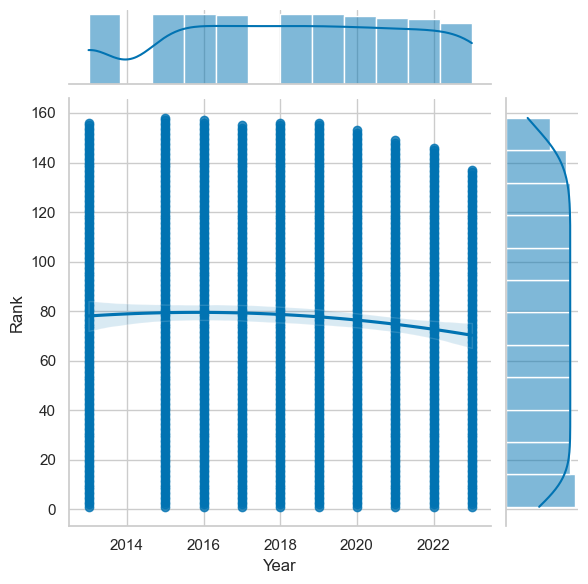

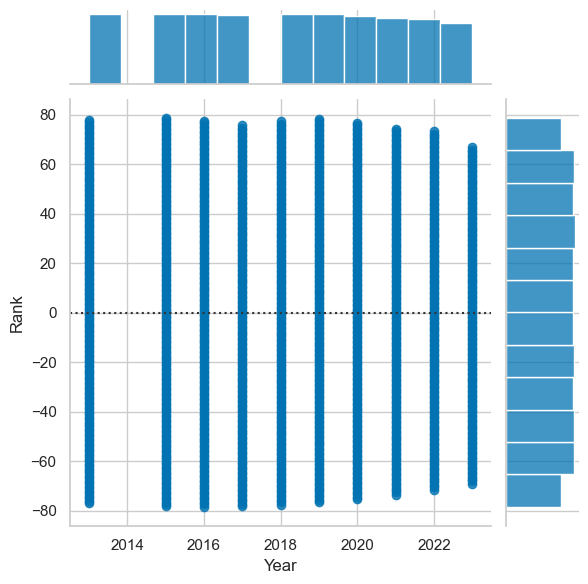

In [30]:
# Plot Year vs. Rank as a regression plot
sns.jointplot(x="Year",
         y="Rank",
         kind='reg',
         data=df,
         # 2nd order polynomial regression
         order=2)

plt.show()

# Plot a jointplot showing the residuals to check the appropriateness of the model.
sns.jointplot(x="Year",
        y="Rank",
        kind='resid',
        data=df,
        order=2)

plt.show()


## Complex jointplots

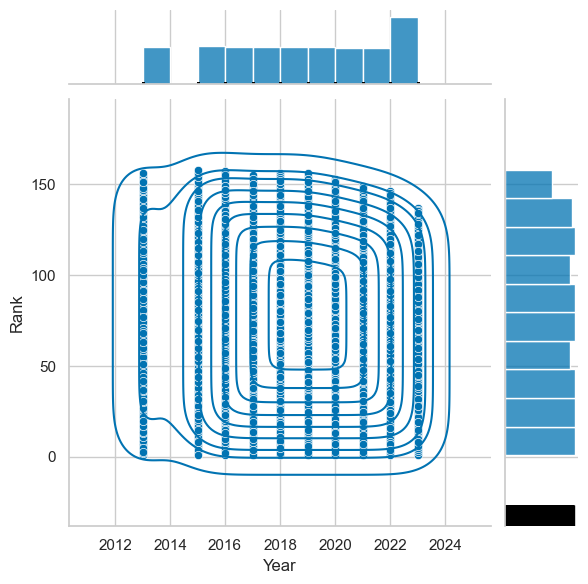

In [31]:
# Create the jointplot of Year vs. Rank without the rug
g = sns.jointplot(x="Year", y="Rank", data=df, kind='scatter', marginal_kws=dict(bins=10))

# Overlay a kdeplot on top of the scatter plot
g.plot_joint(sns.kdeplot)

# Add the rug plots manually on the margins
sns.rugplot(df["Year"], ax=g.ax_marg_x, color='black')
sns.rugplot(df["Rank"], ax=g.ax_marg_y, color='black', height=0.05)  # Using height for the vertical rugplot

plt.show()